Valence — A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

# Statistical test
from scipy.stats import chi2_contingency 

# visualization
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




### Import Data

In [5]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [1]:
def createDF(fileName):
    
    # Import CSV file
    df = pd.read_csv(fileName,sep=',', index_col=[0])
    
    # Rename columns names: "seq": "lyrics", "song": "song name", "label":"valence"
    df.rename(columns={"seq": "lyrics", "song": "song name", "label":"valence"}, inplace=True)
    
    # Create binary column: 1 represent "happy" mood while 0 represent "sad column"
    df['Mood'] = np.where(df['valence'] > 0.5, 1, 0) 
    
    # Remove unneccessary Asci codes
    df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)
    
    # Create 'length' column that represent the lyrics' number of words
    df['length'] = df['lyrics'].apply(length)
    
    return df

In [6]:
fileName = 'Song Lyrics After Cleaning.csv'
lyrics_df = createDF(fileName)
lyrics_df

,artist,lyrics,song name,valence,Mood,length
0,Elijah Blake,no no i aint ever trap out the bando but oh lord dont get me wrong i know a coupl nigga that do im from a place where everybodi know your name they say i gotta watch my attitud when they see money man they all start actin strang so fuck with the one that fuck with you they can never say im brand new it everyday everyday everyday everyday everyday everyday everyday everyday everyday ive been talkin my shit nigga that regular ive been lovin em thick life is spectacular i spend like ima die rich nigga im flexin yeah everyday that everyday that everyday that everyday that everyday everyday i see all of these wannab hot rb singer i swear you all sound the same they start from the bottom so far from the motto you niggasl never be drake shout out to ovo most of them prolli dont know me though i stay in the cut i dont fuck with no bodi but i d that a pun on no id when nobodi know my name runnin for my dream wasnt hard to do you break bread i swear they all pull out a plate eat with the one who starv with you if im winnin then my crew cant lose it everyday everyday everyday everyday everyday everyday everyday everyday everyday ive been talkin my shit nigga that regular ive been lovin em thick life is spectacular i spend like ima die rich nigga im flexin yeah everyday that everyday that everyday that everyday that everyday everyday i heard sinc you got money you chang your actin funni that whi i get on my lone you be lovin when chang is a hobbi who do you dress when you aint got nobodi it everyday everyday everyday everyday everyday everyday everyday everyday everyday ive been talkin my shit nigga that regular ive been lovin em thick life is spectacular i spend like ima die rich nigga im flexin yeah everyday that everyday that everyday that everyday that everyday everyday,Everyday,0.626,1,1792
2,Elijah Blake,she dont live on planet earth no more she found love on venus that her word said she need space time to explor now she movin on and on and on and on is it might fault that your broken is it my fault that your high you caught me cheat with my exgirlfriend but instead of call me i caught her i was like man oh shit my new girl fuckin with my old chick we both bad so she switch pack her bag said she had to take a trip to the othersid the othersid the othersid shes gone shes gone shes gone to the othersid can we get back to how it was befor if i cant have you at least show me what in store and what ive made is come forward more then we can go on and on and on and on is it might fault that your broken is it my fault that your high you caught me cheat with my exgirlfriend but instead of call me you call her i was like man oh shit my new girl fuckin with my old chick we broke bad so she switch pack her bag said she had to take a trip to the othersid the othersid the othersid shes gone shes gone shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid shes gone to the othersid,The Otherside,0.240,0,1313
3,Elijah Blake,trippin off that grigio mobbin light low trippin off that grigio mobbin light low trippin off that grigio mobbin light low babi im surpris you pick up this late at night and im not tryna start a fight but i hate the way we end and the fact you got me cheat i hate these new begin even though i am the reason the onli thing i love right now is you i miss ya go through my phone and call up the number you dont know the make up sex even when it wrong our love was that strong im just trippin off that grigio it suck to see that you dont feel me though pour me a glass and let my feel blow hell naw this messag aint sublimin aw babi pour me a drink to get over you aw babi aw babi i aint no drinker but it gettin me though trippin off that grigio mobbin lig

In [28]:
lyrics_df.iloc[5]['lyrics']

'dies ist lang her da ich dein schmalen hand nahm dies ist lang her schlugst die runden augen auf dies ist lang her am abend wenn wir auf dunklen pfaden gehn erscheinen unser bleichen gestalten wenn un durstet trinken wir die weissen wasser des teich die suss unser traurigen kindheit estorben ruhen wir unterm gebusch schaun den grauen mowen zu fruhlingsgewolk streigen uber die stadt die der monch edler zeiten schweigt doch wenn dunkler wohllaut die seel heimsucht erscheinst do weiss in des freund landschaft dies ist lang her da ich dein schmalen hand nahm dies ist lang her schlugst die runden augen auf dies ist lang her'

In [29]:
str="""Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low

Baby I'm surprised you picked up this late at night
And I'm not tryna start a fight
But I hate the way we ended and the fact you got me cheated
I hate these new beginnings even though I am the reason
The only thing I love right now is you

I miss ya going through my phone
And calling up the numbers you don't know
The make up sex, even when it's wrong
Our love was that strong

[Hook 1]
I'm just trippin' off that Grigio
It sucks to see that you don't feel me though
Pour me a glass and let my feelings blow
Hell naw, this message ain't subliminal
Aw baby, pour me a drink to get over you
Aw baby, aw baby, I ain't no drinker but it's gettin' me though

Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin'

I don't know why your father never like me
Was it because of my [?]boy ways and this white tee? Your eye
Always thought your momma was a winner
Considering her only stayed together after all those years
You think that we could learn from them

I miss ya going through my phone
And calling up the numbers you don't know
The make up sex, even when it's wrong
Our love was that strong

Nights like this, we should be trippin' off that Grigio
Telling me secrets that nobody knows
Pour us a shot and cut the music on
Now let's get started, cut these fuckin' lights off
Aw baby, I'ma pour a drink for you
Aw baby, aw baby, I'ma pour a drink for you

Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin', lights low
Trippin' off that Grigio, mobbin'"""
len(str)

1782

In [30]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109032 entries, 0 to 158352
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   artist     109032 non-null  object 
 1   lyrics     109032 non-null  object 
 2   song name  109032 non-null  object 
 3   valence    109032 non-null  float64
 4   Mood       109032 non-null  int32  
 5   length     109032 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 5.4+ MB


In [31]:
lyrics_df['length'].max()

1976

In [32]:
lyrics_df['length'].describe()

count    109032.000000
mean        978.518765
std         332.161592
min         393.000000
25%         714.000000
50%         925.000000
75%        1192.000000
max        1976.000000
Name: length, dtype: float64

In [33]:
index_list = []

Q1 = np.percentile(lyrics_df['length'], 25)
Q3 = np.percentile(lyrics_df['length'], 75)
IQR = Q3 - Q1
Dare_outlier_rows = lyrics_df[(lyrics_df['length'] < Q1 - 1.5 * IQR) | (lyrics_df['length'] > Q3 + 1.5 * IQR)].index
index_list.extend(Dare_outlier_rows)
print("column is:" , "length", "\nand len is: " ,len(Dare_outlier_rows))
print('\n')

    
# Because it is possible to have duplicate rows, we will create a set    
index_set = set(index_list)
print(index_set, "\n", len(index_set))

column is: length 
and len is:  183


{93697, 53762, 101383, 134159, 50712, 95258, 28190, 155166, 99881, 131629, 72242, 146994, 22069, 123958, 120375, 82488, 77369, 88633, 4667, 108090, 46657, 106052, 91718, 19530, 106062, 17487, 64592, 119376, 75349, 121941, 58455, 91232, 104545, 2146, 24163, 123489, 121958, 23144, 156778, 132716, 116335, 148079, 156271, 48754, 115317, 56438, 119414, 56954, 148092, 42623, 50306, 78469, 29320, 86664, 142986, 56974, 56464, 126097, 75923, 112276, 153750, 55447, 146075, 117916, 131740, 84642, 75944, 68266, 46253, 150189, 119989, 127159, 15545, 8378, 124605, 2244, 2247, 712, 157384, 74443, 47308, 91340, 121550, 125643, 111313, 7379, 29398, 84184, 111322, 8411, 91355, 6877, 91356, 96996, 97511, 32488, 156909, 63727, 44795, 52476, 97019, 100093, 91394, 85256, 157448, 80653, 85263, 49427, 21269, 39189, 150295, 105757, 8482, 145698, 114468, 78632, 127785, 45359, 123697, 13106, 113976, 42811, 118077, 75074, 40260, 73028, 150340, 110920, 39245, 70478, 146766, 10

In [34]:
lyrics_df.drop(index_set, inplace=True)
lyrics_df

,artist,lyrics,song name,valence,Mood,length
0,Elijah Blake,no no i aint ever trap out the bando but oh lo...,Everyday,0.626,1,1792
2,Elijah Blake,she dont live on planet earth no more she foun...,The Otherside,0.240,0,1313
3,Elijah Blake,trippin off that grigio mobbin light low tripp...,Pinot,0.536,1,1619
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,0,769
5,Elijah Blake,i just want to readi your mind caus ill still ...,Uno,0.321,0,1045
...,...,...,...,...,...,...
158347,Adam Green,bind me gag me take me to the bunnyranch peopl...,Bunnyranch,0.723,1,541
158348,Adam Green,and we live on borrow time but this headshot p...,Friends of Mine,0.737,1,748
158349,Adam Green,frozin in time forev carri that torch for so l...,Frozen in Time,0.482,0,611
158351,Adam Green,i want to chose to die and be buri with a rubi...,I Wanna Die,0.361,0,487


### Data Exploration

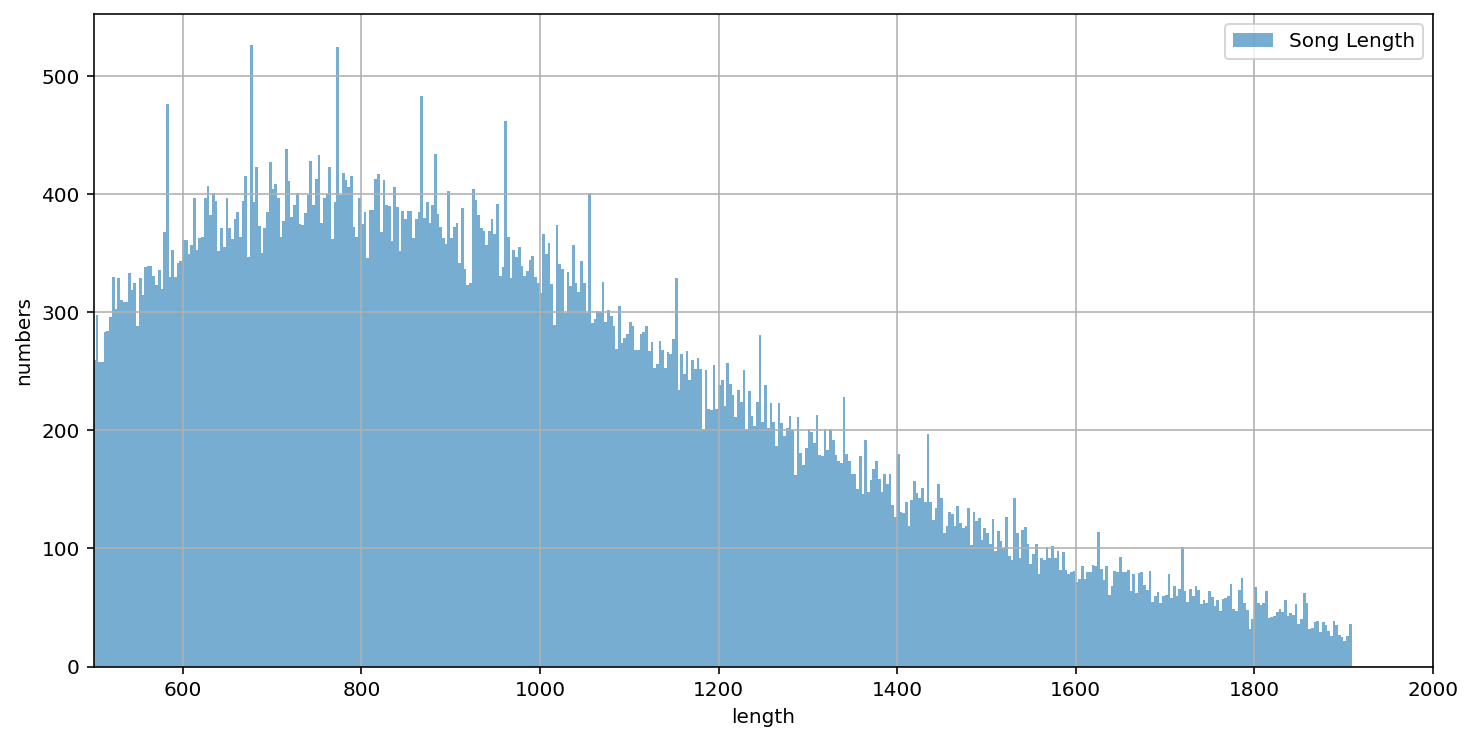

In [35]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(lyrics_df['length'], alpha = 0.6, bins=bins, label='Song Length')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(500,2000)
plt.grid()
plt.show()

Text(0, 0.5, 'Amount')

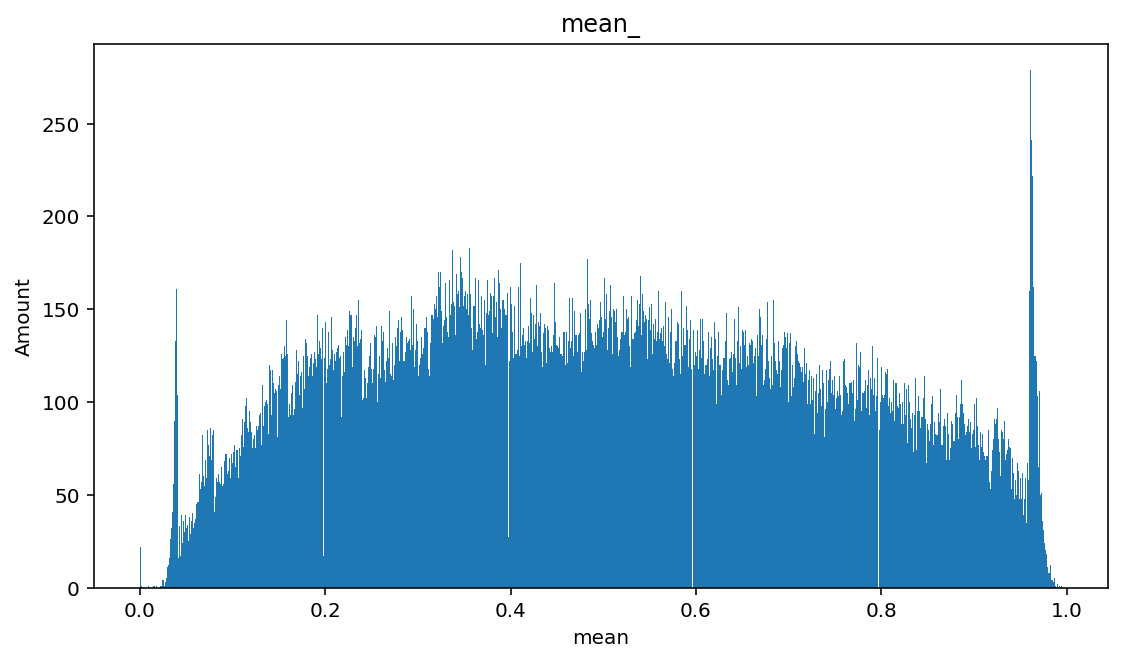

In [36]:
fig = plt.figure(figsize=(20, 5))

# create a subplot in a 1 by 2 grid, and return subplot specified in third parameter
fig1 = fig.add_subplot(1,2,1)

fig1.hist(lyrics_df["valence"],bins=1000)
fig1.set_title('mean_')
fig1.set_xlabel('mean')
fig1.set_ylabel('Amount')

## Visualisation

In [74]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

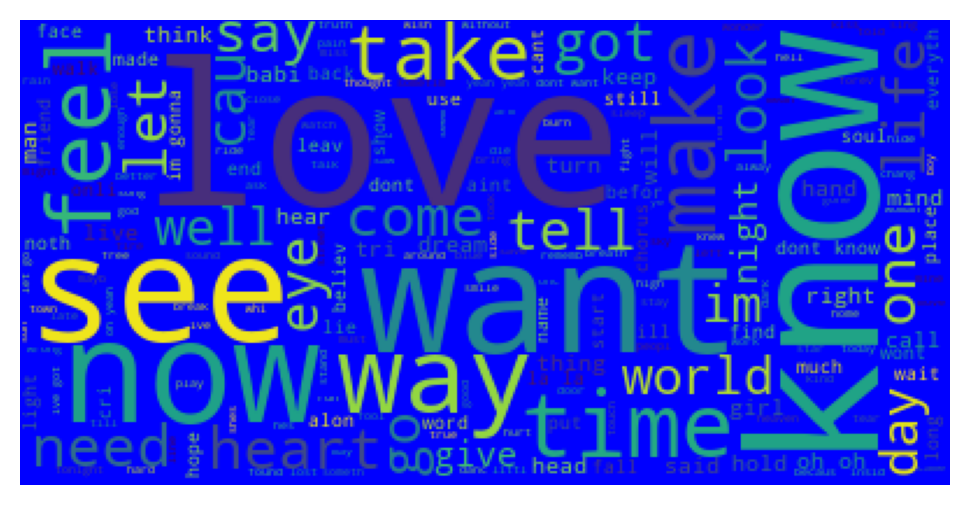

In [81]:
# # Create and generate a word cloud image:
text3 = ' '.join(lyrics_df['lyrics'])
wordcloud2 = WordCloud(width='1000',height='500',background_color='blue').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


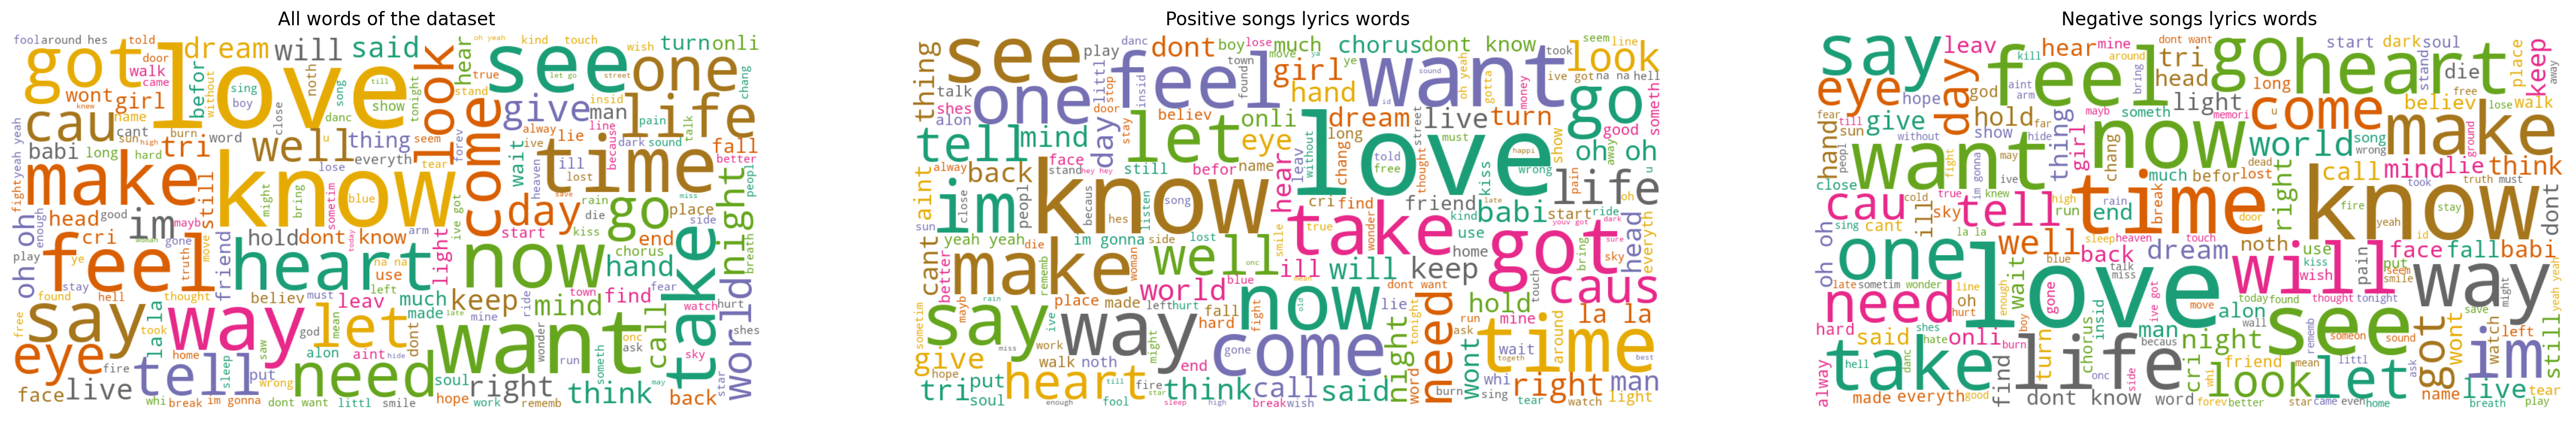

In [97]:
# Create and generate a word cloud image:
text1 = ' '.join(lyrics_df['lyrics'])
text2 = ' '.join(lyrics_df[lyrics_df['Mood'] == 1]['lyrics'])
text3 = ' '.join(lyrics_df[lyrics_df['Mood'] == 0]['lyrics'])
text_list=[text1,text2,text3]
text_name_list=['All words of the dataset','Positive songs lyrics words','Negative songs lyrics words']

fig = plt.figure(figsize=(30,30))

wordcloud = WordCloud(background_color="white",width=1000,height=500, 
                      contour_color="black",  max_font_size=150, random_state=42,
                      colormap="Dark2")

for i in range(3):
    wordcloud.generate(text=text_list[i])   
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(text_name_list[i])
plt.show()


In [87]:
len(lyrics_df[lyrics_df['Mood'] == 1]['lyrics'])

53111

In [88]:
lyrics_df.Mood.value_counts()

0    55738
1    53111
Name: Mood, dtype: int64

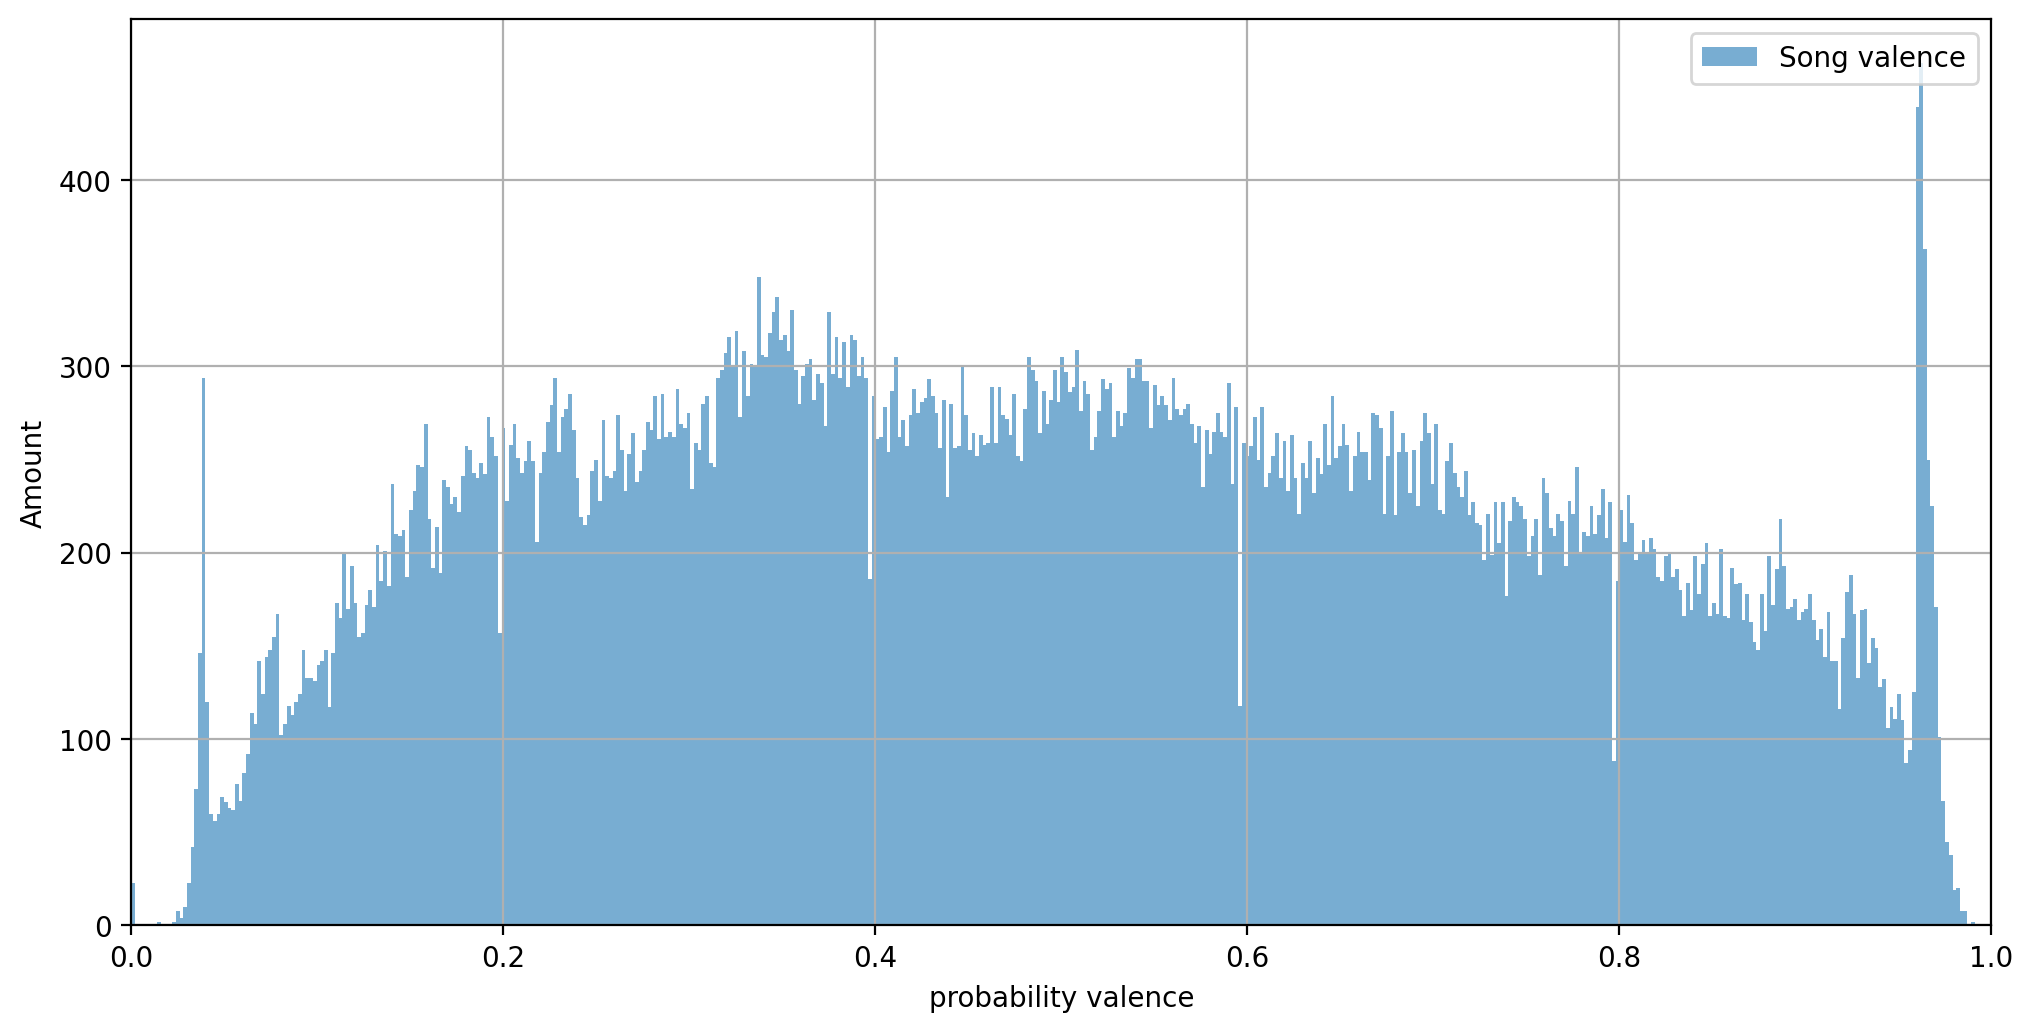

In [61]:
# Valence 
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(lyrics_df['valence'], alpha = 0.6, bins=bins, label='Song valence')

plt.xlabel('probability valence')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.grid()
plt.show()

Text(0.5, 0, 'lyrics length')

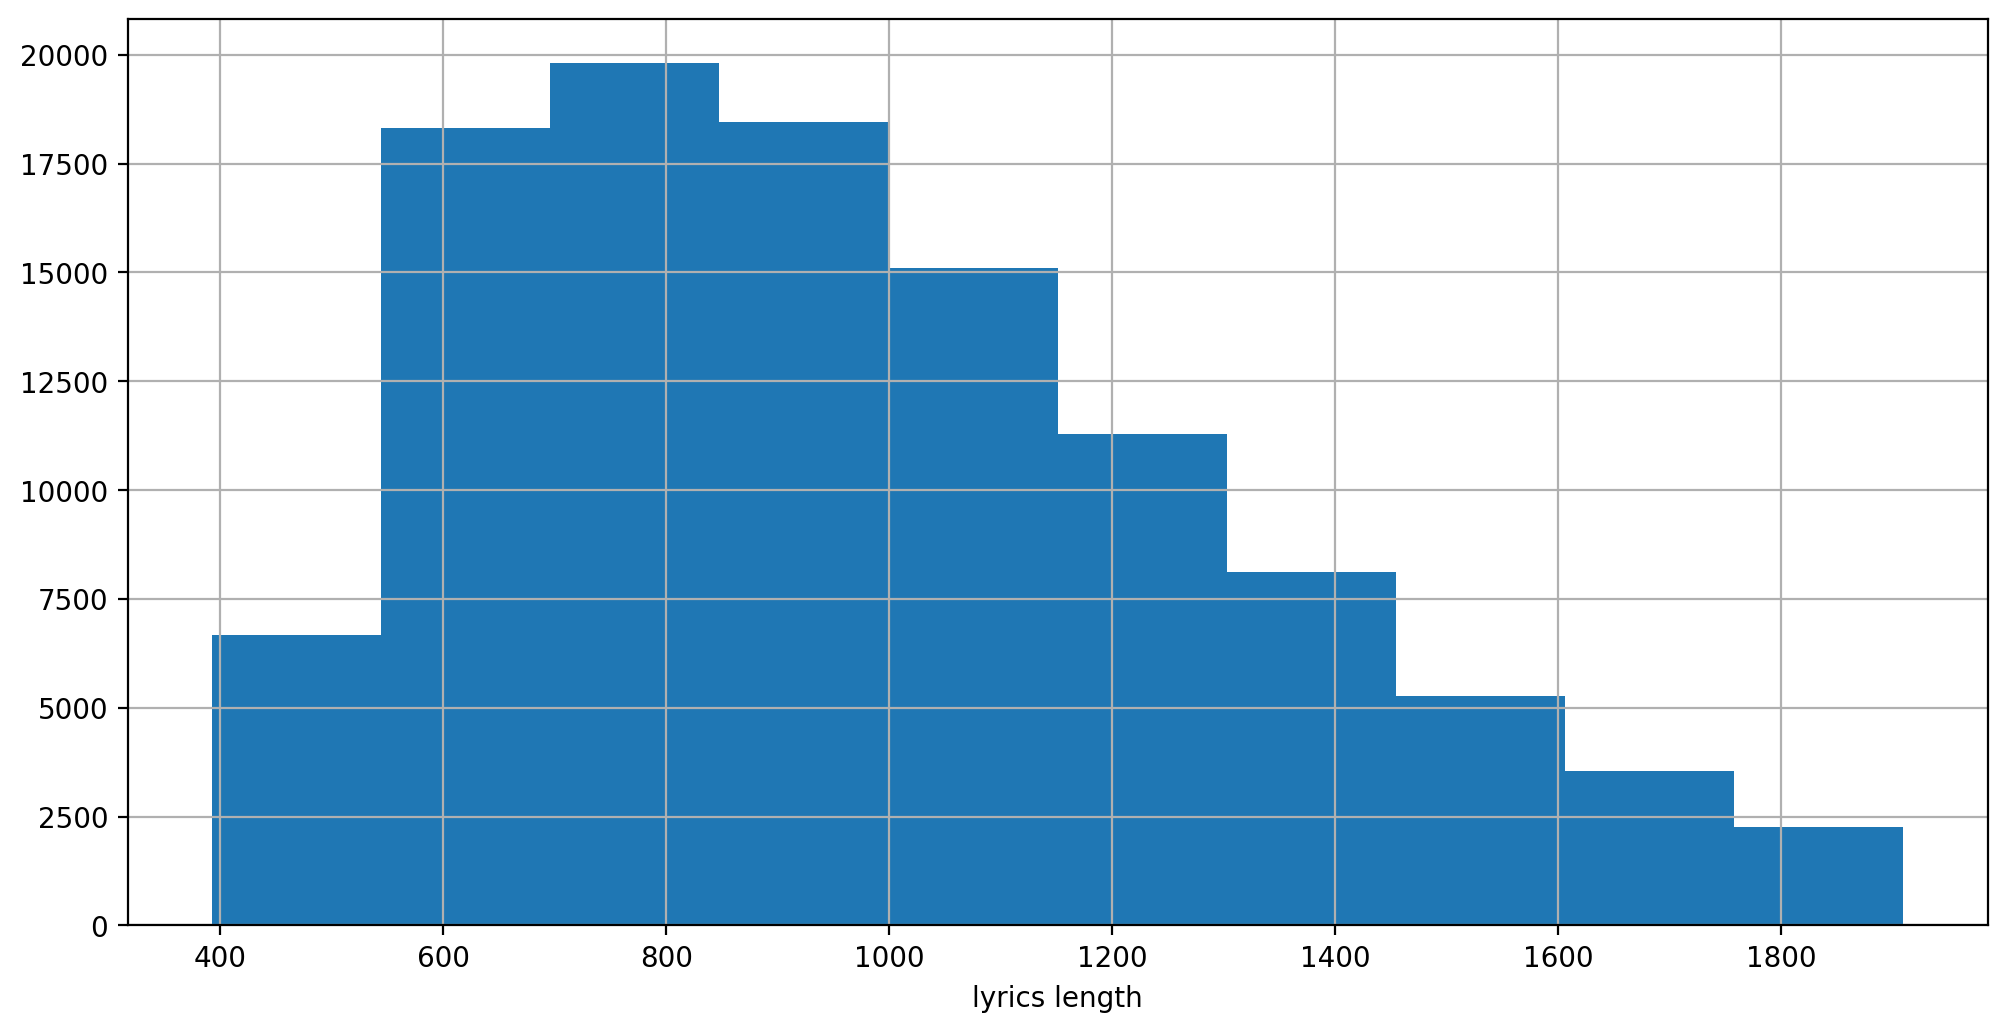

In [40]:
# Check if the num of words in lyrics is normallly distributed:

# simple hist using matplotlib
lyrics_df.length.hist(bins=10)
plt.xlabel('lyrics length')


0    79694
1    69496
Name: Mood, dtype: int64


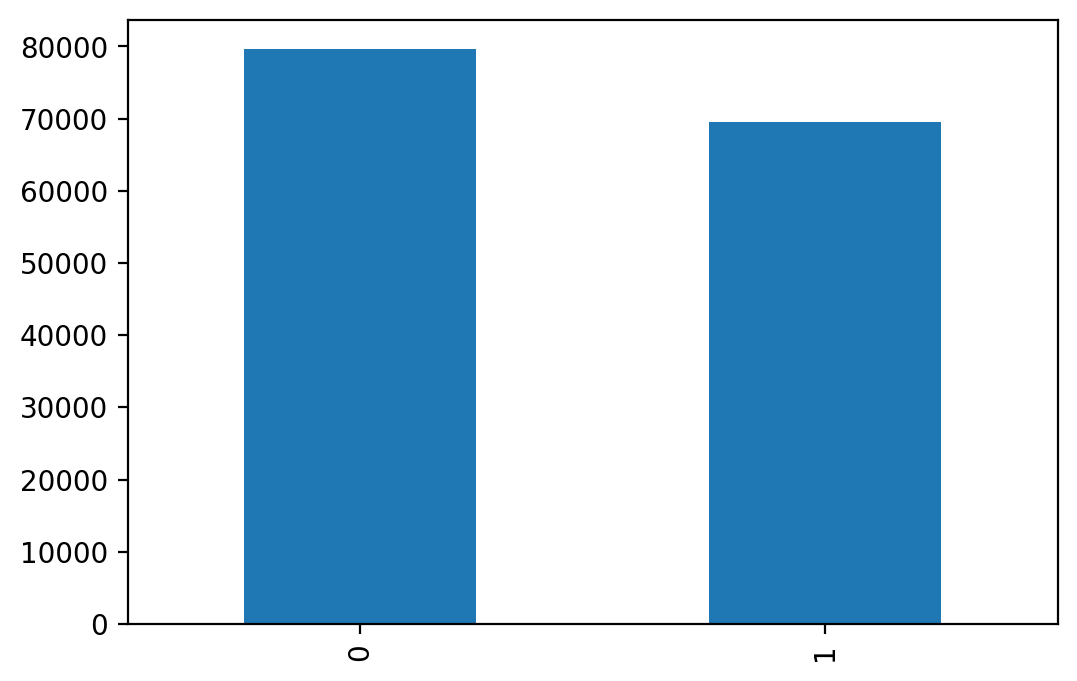

In [21]:
# Plot the amount of songs in each mood
lyrics_df["Mood"].value_counts().sort_index().plot(kind='bar')
print(lyrics_df["Mood"].value_counts().sort_index())

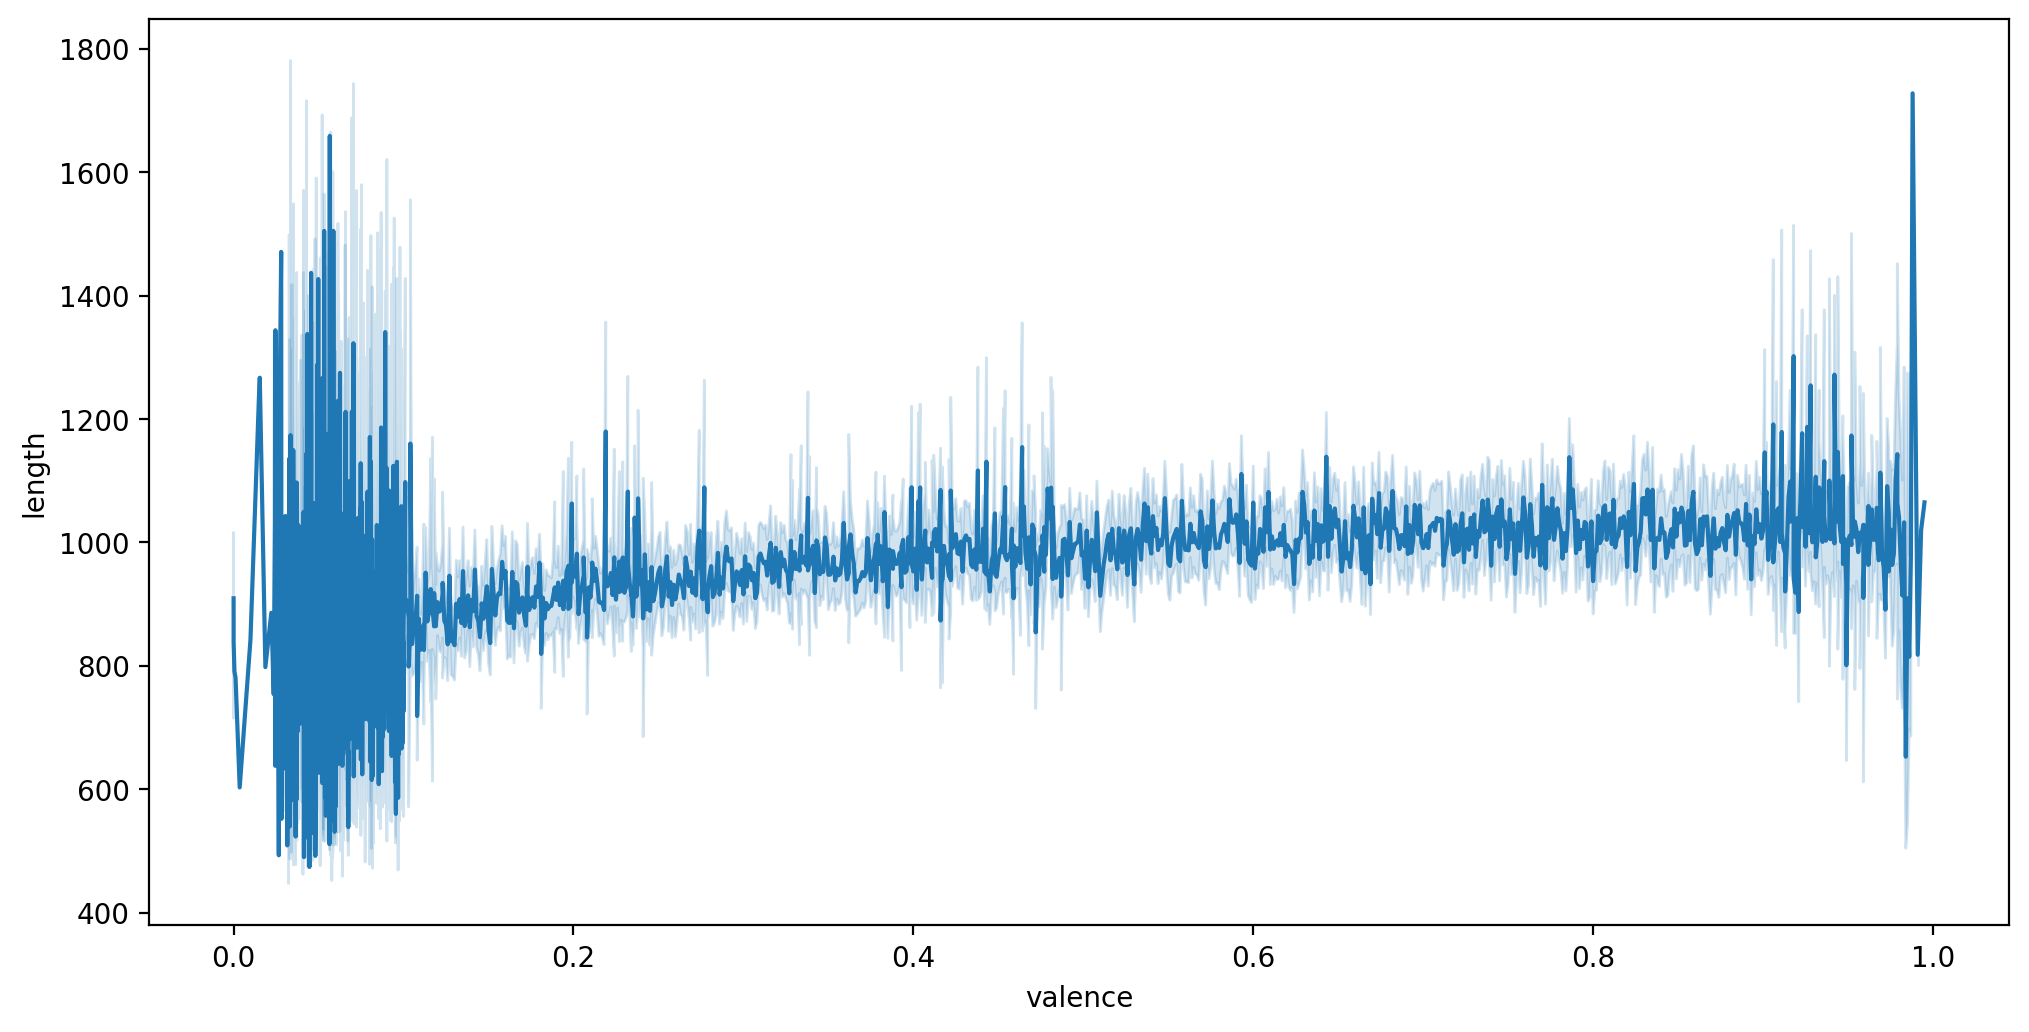

In [62]:
sns.lineplot(data=lyrics_df, x = 'valence', y='length')


In [22]:
# distribution between valence and number of words for each song


# sns.jointplot(data=lyrics_df, x="length", y="valence", hue="Mood")


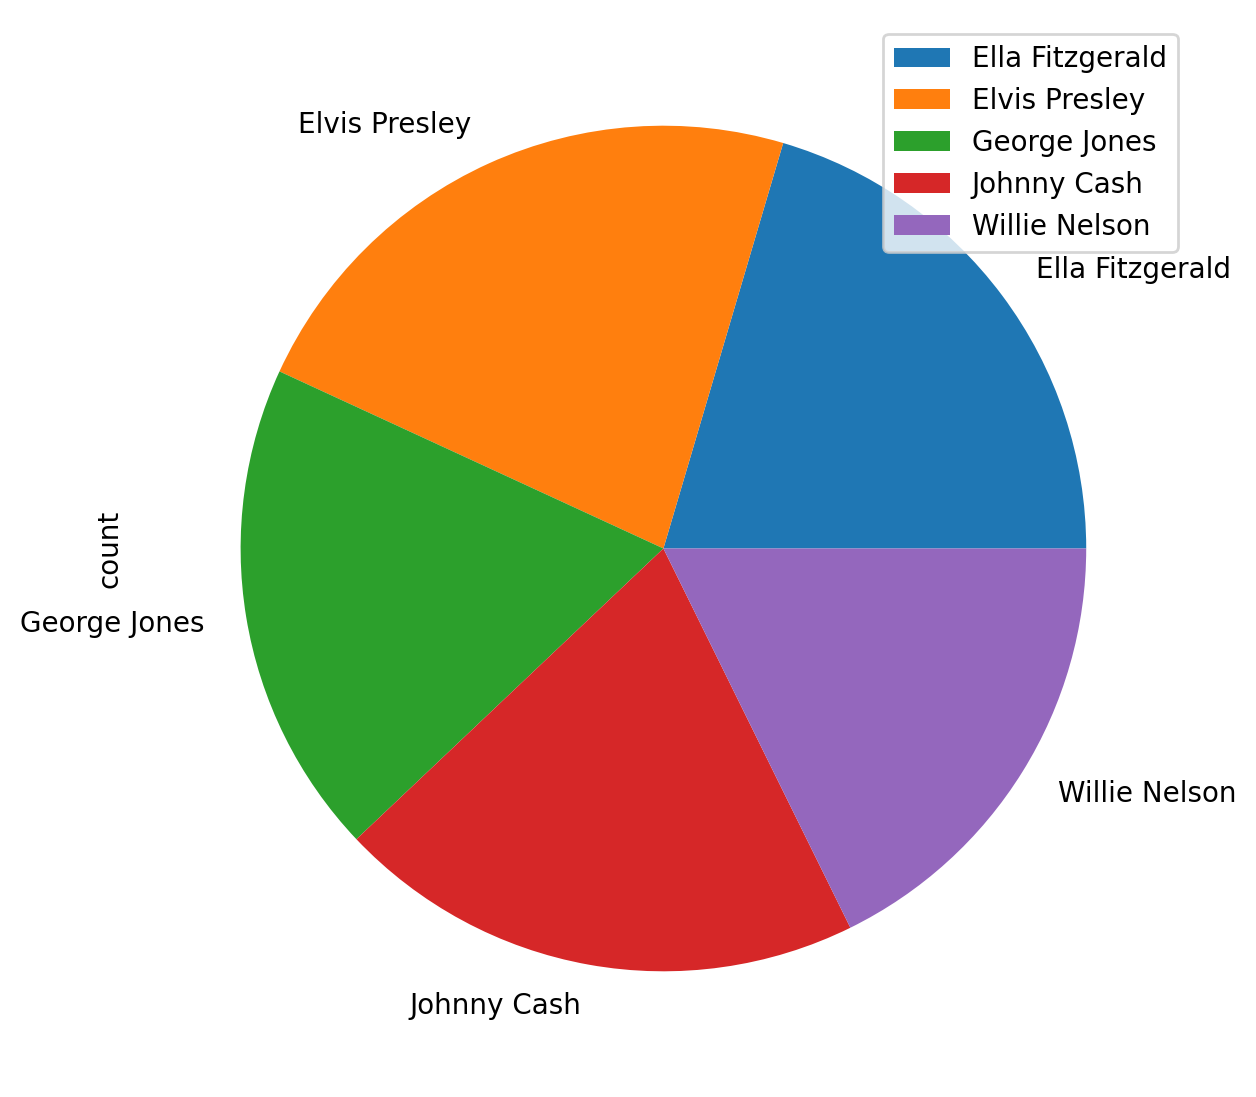

In [72]:
def createSortedPivotTable(df):
    
    pivot = pd.pivot_table(lyrics_df, index='artist',aggfunc='count')
    pivot = pivot.drop(['length', 'lyrics','song name','valence'], axis=1)
    pivot.rename(columns={"Mood": "count"}, inplace=True)    
    return pivot

df_frquent_artists=createSortedPivotTable(lyrics_df)
df_frquent_artists=df_frquent_artists[(df_frquent_artists["count"].sort_values(ascending=False))>400]
plot = df_frquent_artists.plot.pie(y='count', figsize=(7, 7))


## Chi-2-test between 'artist' and 'mood'


In [59]:
# Create a function 'calculate_column_connection'.Checking if two categorical variables are independent 
# Input: 2 columns in 'lyrics_df' dataset 
# Output: P value, Crammer's V

def calculate_seq_connection(seq1,seq2):
    # Create lst 
    lst=[]
    # Create cross tabulation 
    ct1=pd.crosstab(seq1, seq2)
    # Chi-squared test statistic, sample size, and minimum of rows and columns
    X=chi2_contingency(ct1)
    X2 = chi2_contingency(ct1, correction=False)[0]
    n = ct1.values.sum()
    minDim = min(ct1.shape)-1
    # Calculate Cramer's V 
    V = np.sqrt((X2/n) / minDim)
   
    lst.append(X[1])
    lst.append(V)

    if(X[1]<=0.05):
        print('the P value is:{} => Dependent (reject H0)'.format(X[1]))
        # Display Cramer's V
        print("Crammer's V",V)
        lst.append("Dependent (reject H0)")

        
        
    else:
        print('the P value is:{} => Independent (H0 holds true)'.format(X[1]))
        lst.append("ndependent (H0 holds true)")
    return(lst)
    
# Input: df
# Output: new df contains the results of chi-2-test of all seq in the df
def create_chi_2_test_df(df):
    
    lst=[]
    d = {"p-val":[],"Independent/not":[],"Crammer's V":[]}
    print(type(d))
    lst=calculate_seq_connection(df['Mood'],df['artist'])
    d["p-val"].append(lst[0])
    d["Crammer's V"].append(lst[1])
    d["Independent/not"].append(lst[2])
            
    return(pd.DataFrame.from_dict(d))


        





<class 'dict'>
the P value is:0.0 => Dependent (reject H0)
Crammer's V 0.5140649068359315


,p-val,Independent/not,Crammer's V
0,0.0,Dependent (reject H0),0.514065


In [60]:
# Transfer 'Mood' column to categorical column
lyrics_df['Mood'] = lyrics_df.Mood.astype('category')
# Check if there is dependency between 'Mood' and 'artist' column
df_chi_2_test_lyrics_df= create_chi_2_test_df(lyrics_df)
df_chi_2_test_lyrics_df

<class 'dict'>
the P value is:0.0 => Dependent (reject H0)
Crammer's V 0.5140649068359315


,p-val,Independent/not,Crammer's V
0,0.0,Dependent (reject H0),0.514065


In [8]:
visulization_df = lyrics_df.copy()

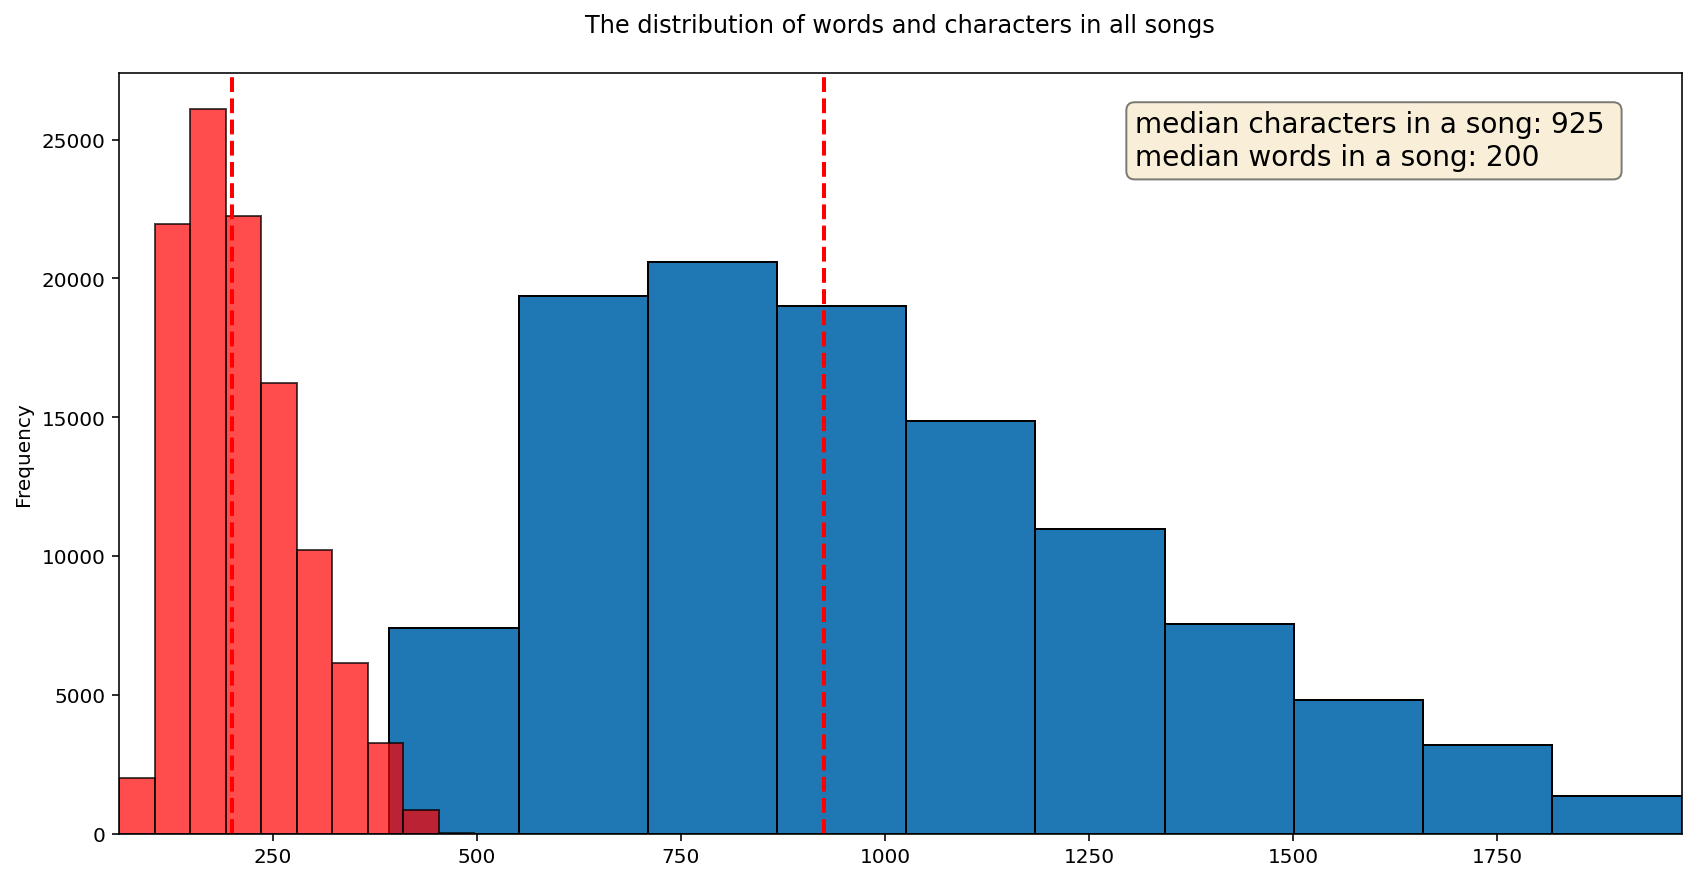

In [9]:
visulization_df['story_len'] = visulization_df['lyrics'].map(lambda x: len(x))
visulization_df['story_n_words'] = visulization_df['lyrics'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df.story_len.plot(kind='hist',edgecolor="k");
visulization_df.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a song: {round(visulization_df['story_len'].median())} \n"
           f"median words in a song: {round(visulization_df['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in all songs", pad=20);plt.margins(x=0);


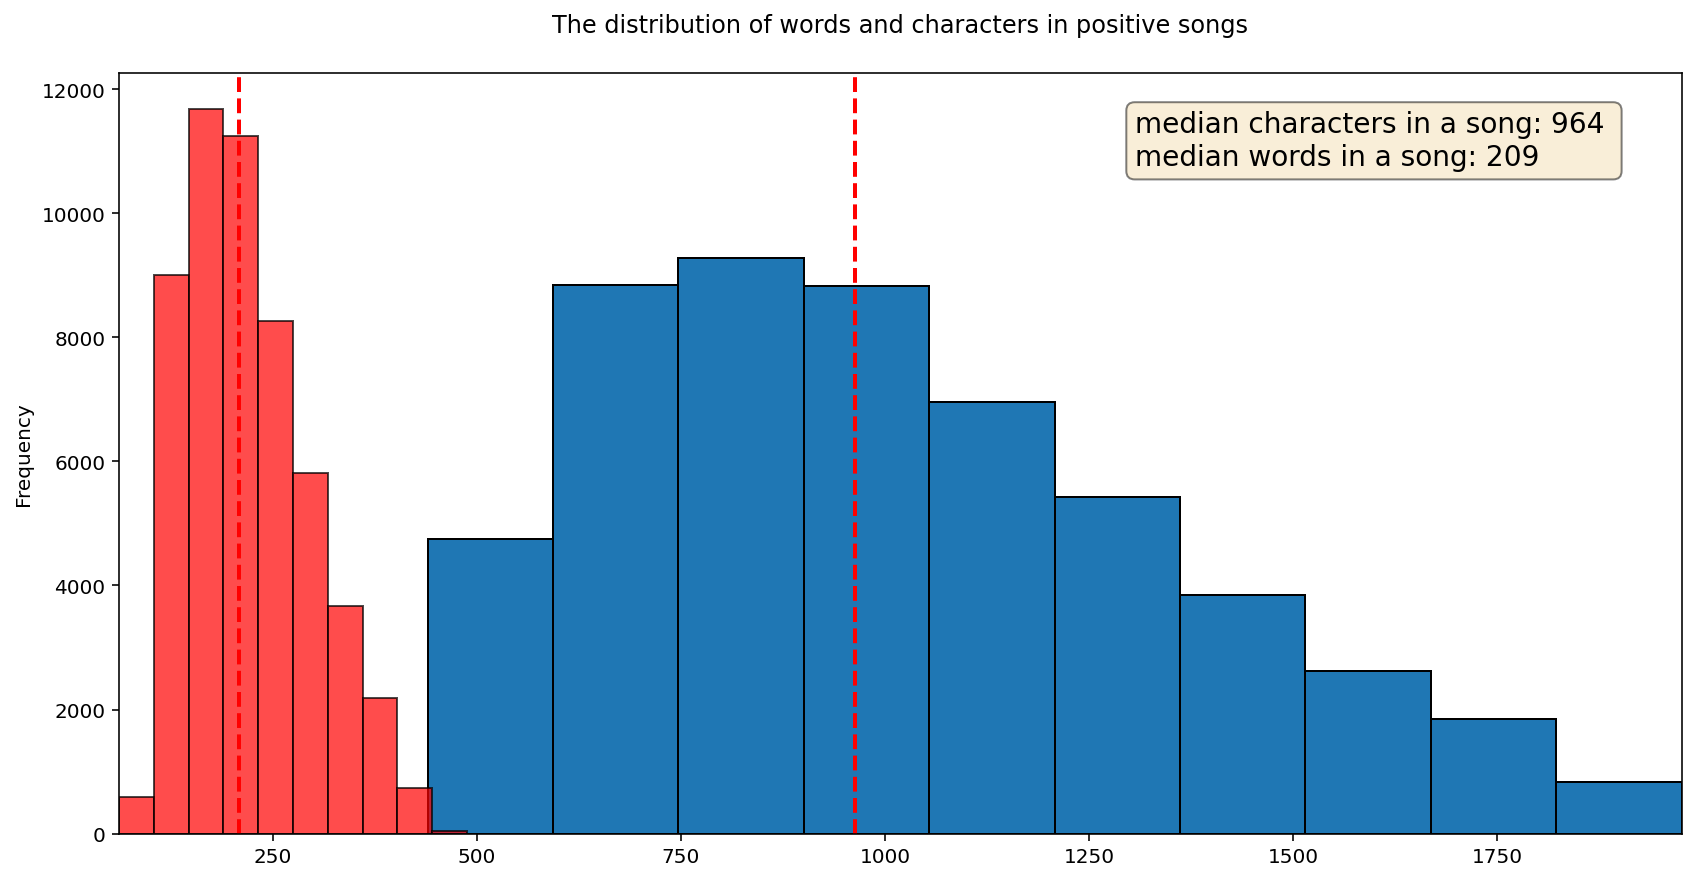

In [11]:
visulization_df_positive = lyrics_df[lyrics_df['Mood'] == 1].copy()

visulization_df_positive['story_len'] = visulization_df_positive['lyrics'].map(lambda x: len(x))
visulization_df_positive['story_n_words'] = visulization_df_positive['lyrics'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df_positive.story_len.plot(kind='hist',edgecolor="k");
visulization_df_positive.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df_positive['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df_positive['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a song: {round(visulization_df_positive['story_len'].median())} \n"
           f"median words in a song: {round(visulization_df_positive['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in positive songs", pad=20);plt.margins(x=0);


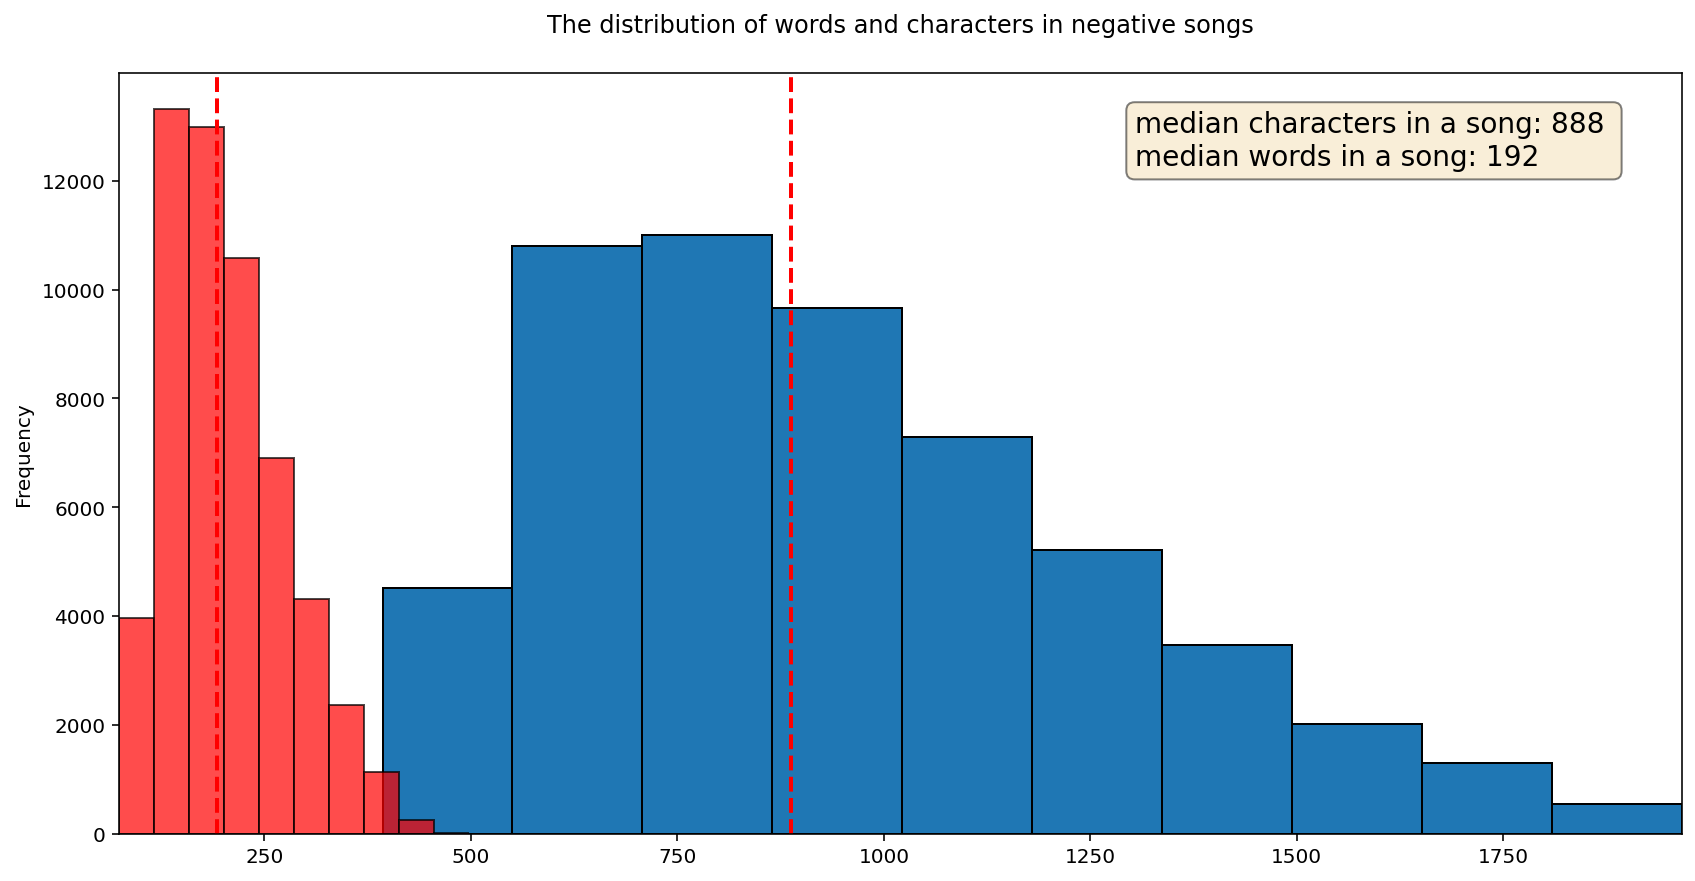

In [10]:
visulization_df_negative = lyrics_df[lyrics_df['Mood'] == 0].copy()

visulization_df_negative['story_len'] = visulization_df_negative['lyrics'].map(lambda x: len(x))
visulization_df_negative['story_n_words'] = visulization_df_negative['lyrics'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df_negative.story_len.plot(kind='hist',edgecolor="k");
visulization_df_negative.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df_negative['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df_negative['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a song: {round(visulization_df_negative['story_len'].median())} \n"
           f"median words in a song: {round(visulization_df_negative['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in negative songs", pad=20);plt.margins(x=0);